In [117]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from math import ceil, sqrt

In [102]:
def read(i, type):
    df = pd.read_csv('dataset/' + str(i).rjust(2, '0') + '_' + type + '.csv')
    y = df['y']
    x = df.drop('y', axis=1)
    return x, y

dfs = []
for i in range(1, 21 + 1):
    dfs.append({'data': [read(i, 'train'),
                         read(i, 'test')]})

Для каждого набора данных определите оптимальную высоту дерева принятия решений относительно точности классификации на проверочном множестве.

In [103]:
%%time
for df in dfs:
    train, test = df['data']
    x_train, y_train = train
    x_test, y_test = test

    for params in ParameterGrid({'criterion': ['gini', 'entropy']
                                ,'splitter' : ['best', 'random']
                                ,'max_depth': [5, 10, 15]}):
        clf = DecisionTreeClassifier(**params)
        clf.fit(x_train, y_train)

        accuracy = accuracy_score(y_test, clf.predict(x_test))
        if 'max score' not in df or accuracy > df['max score']:
            df['max score'] = accuracy
            df['max depth'] = params['max_depth']

Wall time: 23.4 s


Выберите два набора данных: набор с минимальной и максимальной  оптимальной высотой.
Для этих двух наборов данных нарисуйте график зависимости точности классификации на тренировочном и проверочном множестве от высоты.

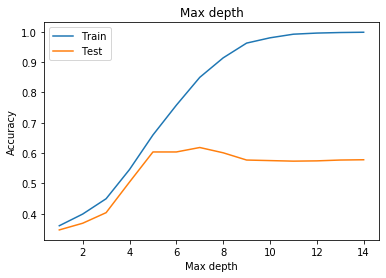

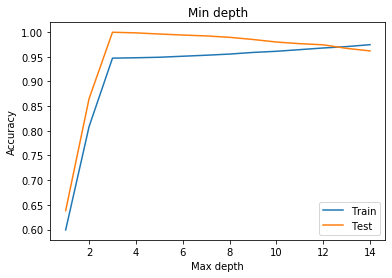

In [104]:
get = lambda x: x['max depth']
outliers = max(dfs, key=get), min(dfs, key=get)

for df, title in zip(outliers, ['Max depth', 'Min depth']):
    train, test = df['data']
    x_train, y_train = train
    x_test, y_test = test

    plt.xlabel("Max depth")
    plt.ylabel("Accuracy")

    for x_test, y_test, label in zip([x_train, x_test], [y_train, y_test], ['Train', 'Test']):
        records = {}
        for max_depth in range(1, 15):
            clf = DecisionTreeClassifier(max_depth=max_depth).fit(x_train, y_train)
            records[max_depth] = accuracy_score(y_test, clf.predict(x_test))
        plt.plot(list(records.keys()), list(records.values()), label=label)
    plt.legend()
    plt.title(title)
    plt.show()

Для каждого набора данных постройте лес решающих деревьев без ограничения высоты и определите точность классификации на тренировочном и проверочном множестве.

In [116]:
class RandomForest(BaseEstimator):
    def __init__(self, n):
        self.n = n
        self.trees = [DecisionTreeClassifier(max_features=sqrt(self.n) for _ in range(n)]
        

    def fit(x_train, y_train):
        

RandomForest(3)

ValueError: Invalid parameter features for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.